In [1]:
# %load imports.py

import sys
import numpy as np
import cPickle as pickle
%matplotlib inline
import matplotlib.pyplot as plt

ale_dir = '/Users/pvrancx/Documents/Code/PyALE/'
sys.path.append(ale_dir+'src')

In [2]:
#load LoggerAgent output
with open('../data/space_invaders/Logger_trans.1','rb') as f:
    log = pickle.load(f)

In [3]:
#extract frame data
frames=log[0][:,128:] #first 128 ints are RAM

In [5]:
frames.shape

(50000, 33600)

In [4]:
from util.image_processing import get_frame_data_gray, crop_image, as_RGB

sample frame:

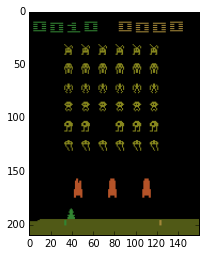

In [5]:
plt.imshow(as_RGB(frames[1540,:].reshape(210,160)))

These (210x160) frames contain atari color codes. We convert to grayscale and resize the image to (84x84)

grayscale:

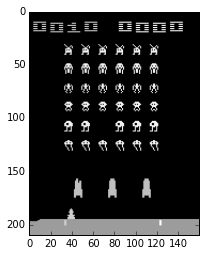

In [6]:
plt.imshow(get_frame_data_gray(frames[1540,:],im_shape=(210,160)),cmap=plt.get_cmap('gray'))

Minh et al. (Deepmind DQN paper) resize frames to (110,84) then crop to (84,84). Equally cropping bottom and top seems to cut off the player space ship.

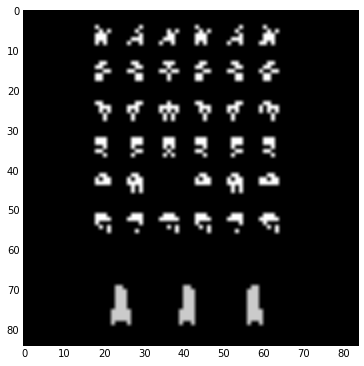

In [18]:
plt.figure(figsize=(6,6))
plt.imshow(crop_image(get_frame_data_gray(frames[1540,:],im_shape=(110,84)),13,0,13,0),cmap=plt.get_cmap('gray'))

Cutting more from top gives better result:

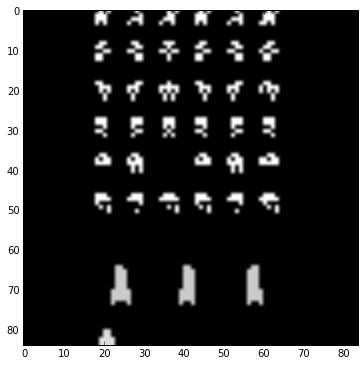

In [17]:
plt.figure(figsize=(6,6))
plt.imshow(crop_image(get_frame_data_gray(frames[1540,:],im_shape=(110,84)),18,0,8,0),cmap=plt.get_cmap('gray'))

Alternative resize & crop. Keeps top of enemies

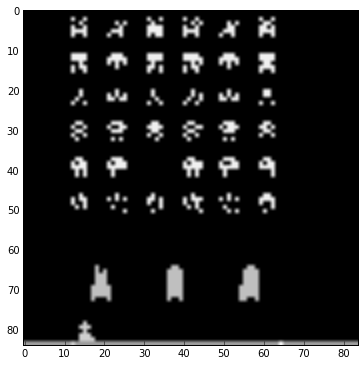

In [19]:
plt.figure(figsize=(6,6))
plt.imshow(crop_image(get_frame_data_gray(frames[1540,:],im_shape=(104,94)),14,2,6,8),cmap=plt.get_cmap('gray'))

In [7]:
#preprocess all frames
frames_processed = np.zeros((frames.shape[0],84*84),dtype='uint8')

for i in range(frames.shape[0]):
    frames_processed[i,:] = crop_image(get_frame_data_gray(frames[i,:],im_shape=(110,84)),18,0,8,0).flatten()

In [27]:
#dump processed frames to file
with open('../data/space_invaders/frames_proc.pkl','wb') as f:
    pickle.dump(frames_processed,f)